<div style="
background-color:#f0f4ff;
padding:28px;
border-radius:12px;
border-left:8px solid #4a6cf7;
font-family:Segoe UI, Arial, sans-serif;
">

<h1 style="color:#4a6cf7; margin:0 0 10px 0; font-weight:700;">
📊 Khám phá dữ liệu (Exploratory Data Analysis)
</h1>

<p style="margin:0 0 10px 0; font-size:16px; color:#111;">
<b>Mục tiêu:</b> Phân tích toàn diện cấu trúc dữ liệu, phân phối các biến, phát hiện outliers và patterns,
tìm hiểu mối quan hệ giữa các yếu tố để rút ra insights về nguy cơ đột quỵ.
</p>

<p style="margin:0 0 12px 0; font-size:14px; color:#333;">
<b>Dataset:</b> 5,110 bệnh nhân × 12 đặc trưng<br>
<b>Phương pháp:</b> Descriptive statistics, Visualization, Correlation analysis, Statistical tests<br>
<b>Output:</b> Insights về yếu tố nguy cơ, Issues cần xử lý trong preprocessing
</p>

</div>

In [21]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
print("Đã import thư viện thành công!")

Đã import thư viện thành công!


**Mục tiêu:** xác nhận kích thước, kiểu dữ liệu, bộ nhớ để hiểu nhanh dataset.

In [22]:
# Step 1: Overview
# Load dataset into df_raw, copy to df and show basic summary
file_path = '../data/healthcare-dataset-stroke-data.csv'
df_raw = pd.read_csv(file_path)      # load file gốc

# Hiển thị yêu cầu
# Load dữ liệu
df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')


mem = df.memory_usage(deep=True).sum()/(1024*1024)  # convert to MB
print(pd.DataFrame({
    "số dòng":[df.shape[0]],
    "số cột":[df.shape[1]],
    "bộ nhớ (MB)":[mem]
}))
print("\nInfo:")
df.info()
print("\n Ví dụ 5 row với random_state=42:")
display(df.sample(5, random_state=42))


   số dòng  số cột  bộ nhớ (MB)
0     5110      12     1.813748

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

 Ví dụ 5 row với random_state=42:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4688,40041,Male,31.0,0,0,No,Self-employed,Rural,64.85,23.0,Unknown,0
4478,55244,Male,40.0,0,0,Yes,Self-employed,Rural,65.29,28.3,never smoked,0
3849,70992,Female,8.0,0,0,No,children,Urban,74.42,22.5,Unknown,0
4355,38207,Female,79.0,1,0,Yes,Self-employed,Rural,76.64,19.5,never smoked,0
3826,8541,Female,75.0,0,0,Yes,Govt_job,Rural,94.77,27.2,never smoked,0


1. Tổng quan
Số hàng (rows): 5110.
Số cột (columns): 12.
Bộ nhớ (deep): 1,901,853 bytes (~1.90 MB) (pandas df.info() báo ~479.2 KB non-deep).


2. Mỗi hàng đại diện cho: một bệnh nhân / một hồ sơ y tế (dataset liên quan tới stroke — từng cá thể).


3. Danh sách biến (columns): id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke.


4. Nhận xét:
- Kích thước dataset phù hợp cho bài đồ án (>=1000 rows).
- Có cả biến số (numeric) và biến phân loại (categorical); có biến id khả năng chỉ là identifier.
- Một số cột kiểu object (chuỗi) cần kiểm tra consistency; stroke khả năng là target nhị phân.

**Mục tiêu Bước 2:** Kiểm tra tính toàn vẹn dữ liệu — phát hiện duplicate, hàng trống để quyết định xử lý tiếp theo.

In [23]:
# Step 2: Data Integrity
df = df_raw.copy()

# ---- 1) Kiểm tra duplicated rows ----
n_dup = df.duplicated().sum()
dup_rows = df[df.duplicated()].head()  # show 5 dòng duplicated đầu tiên

print("Số dòng duplicated:", n_dup)
print("\n5 dòng duplicated đầu tiên (nếu có):")
display(dup_rows)

# ---- 2) Kiểm tra fully-empty rows ----
empty_rows = df[df.isna().all(axis=1)]
n_empty = empty_rows.shape[0]

print("\nSố dòng trống hoàn toàn:", n_empty)
display(empty_rows.head())


Số dòng duplicated: 0

5 dòng duplicated đầu tiên (nếu có):


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke



Số dòng trống hoàn toàn: 0


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


- Kết quả duplicate: dataset không có dòng trùng. Có thể thấy dữ liệu khá sạch về mặt duplicate.

- Kết quả fully-empty rows: thông thường dataset này không có hàng trống hoàn toàn.

Nhận xét ngắn (1–3):
- Không có duplicate → không ảnh hưởng đến phân phối dữ liệu.
- Không có hàng trống → cấu trúc file ổn định, không lỗi import.

**Mục đích bước 3:** Liệt kê toàn bộ cột, kiểu dữ liệu (dtype), số unique, missing và ví dụ giá trị để có cái nhìn chính xác về cấu trúc dataset.

In [24]:
df = df_raw.copy()

# tạo bảng thống kê
col_info = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str),
    "n_unique": df.nunique().values,
    "n_missing": df.isna().sum().values,
    "pct_missing": (df.isna().mean() * 100).round(2).values,
    "example_values": [df[col].dropna().astype(str).unique()[:5] for col in df.columns]
})

display(col_info)

,column,dtype,n_unique,n_missing,pct_missing,example_values
id,id,int64,5110,0,0.00,"[9046, 51676, 31112, 60182, 1665]"
gender,gender,object,3,0,0.00,"[Male, Female, Other]"
age,age,float64,104,0,0.00,"[67.0, 61.0, 80.0, 49.0, 79.0]"
hypertension,hypertension,int64,2,0,0.00,"[0, 1]"
heart_disease,heart_disease,int64,2,0,0.00,"[1, 0]"
ever_married,ever_married,object,2,0,0.00,"[Yes, No]"
work_type,work_type,object,5,0,0.00,"[Private, Self-employed, Govt_job, children, N..."
Residence_type,Residence_type,object,2,0,0.00,"[Urban, Rural]"
avg_glucose_level,avg_glucose_level,float64,3979,0,0.00,"[228.69, 202.21, 105.92, 171.23, 174.12]"
bmi,bmi,float64,418,201,3.93,"[36.6, 32.5, 34.4, 24.0, 29.0]"


- id đang là numeric nhưng thực chất là identifier, nên loại bỏ khỏi modeling.
- Các biến nhị phân (hypertension, heart_disease, stroke) là int 0/1, phù hợp cho modeling.
- Một số cột dạng chuỗi (gender, ever_married, work_type, Residence_type, smoking_status) có số lượng category vừa phải → phù hợp để phân tích

**Mục tiêu Bước 4:** Phân tích biến số số (thống kê mô tả, phân phối, và phát hiện outlier) để quyết định bước tiền xử lý tiếp theo.

In [25]:
# Step 4: Numerical Columns Analysis
df_num = df.select_dtypes(include=[np.number]).copy()   # chỉ lấy numerical
df_num_cols = df_num.columns.tolist()

print("Numerical columns:", df_num_cols)

# -----------------------------
# 1) Descriptive Statistics
# -----------------------------
display(df_num.describe().T)

Numerical columns: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


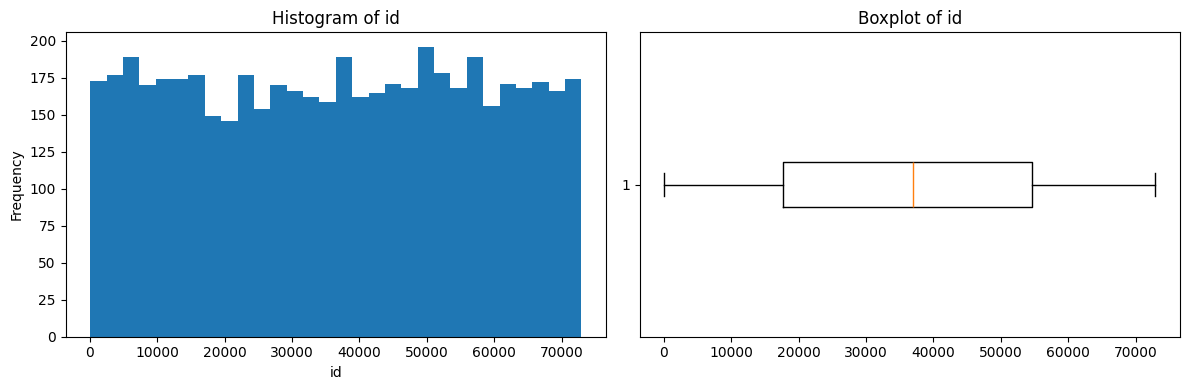

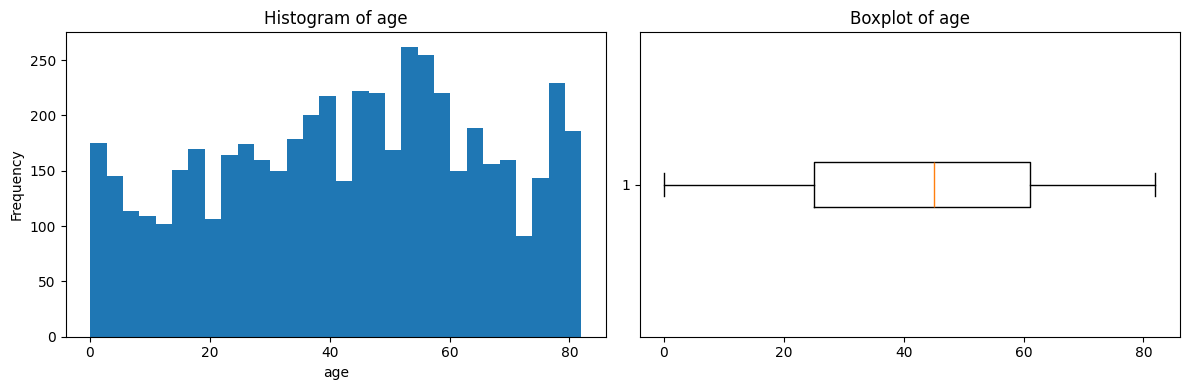

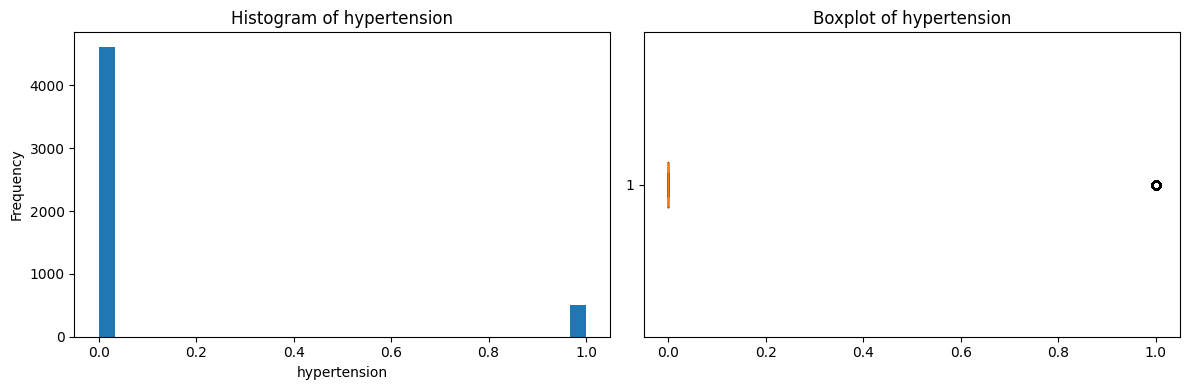

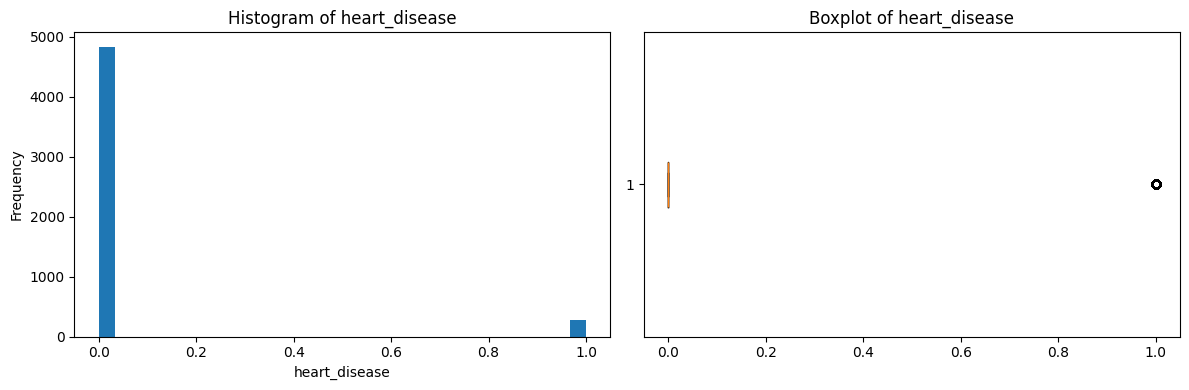

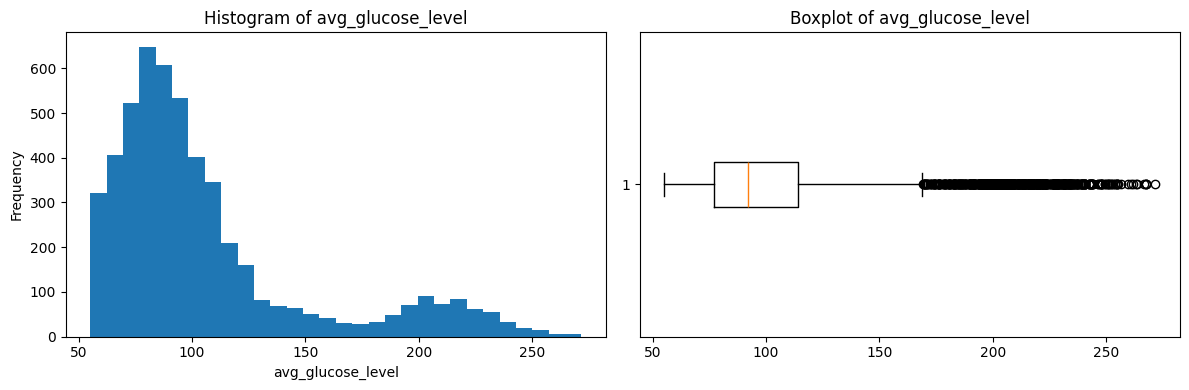

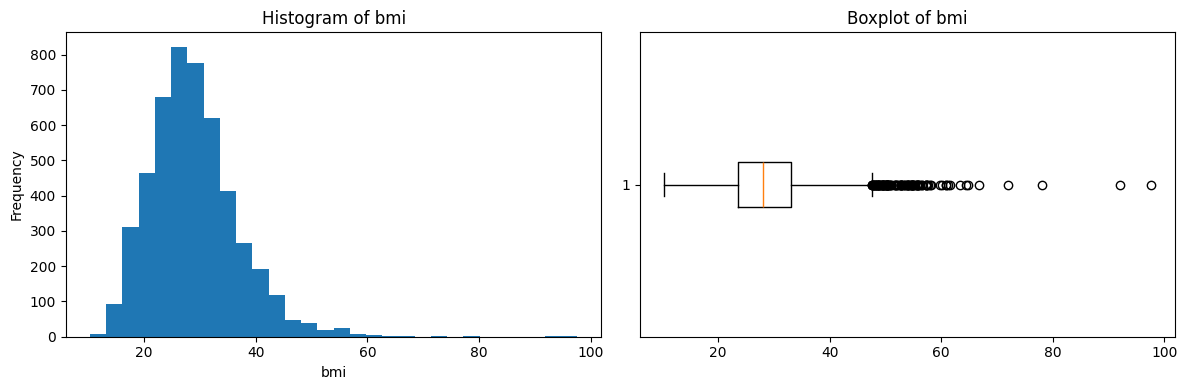

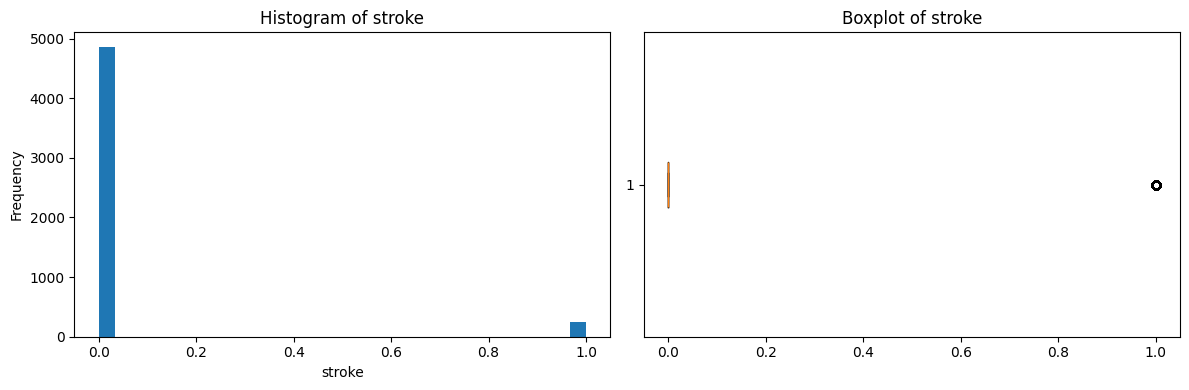

In [26]:
# -----------------------------
# 2) Histogram + Boxplot
# -----------------------------
for col in df_num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    
    # Histogram
    ax[0].hist(df_num[col].dropna(), bins=30)
    ax[0].set_title(f"Histogram of {col}")
    ax[0].set_xlabel(col)
    ax[0].set_ylabel("Frequency")
    
    # Boxplot
    ax[1].boxplot(df_num[col].dropna(), vert=False)
    ax[1].set_title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()

In [27]:
# -----------------------------
# 3) Outlier detection (IQR + Z-score)
# -----------------------------

outlier_results = {}

for col in df_num_cols:
    values = df_num[col].dropna()
    
    # IQR rule
    Q1, Q3 = values.quantile(0.25), values.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    iqr_outliers = df_num[(df_num[col] < lower) | (df_num[col] > upper)].index.tolist()
    
    # Z-score rule
    z = (values - values.mean()) / values.std()
    z_outliers = z[abs(z) > 3].index.tolist()
    
    outlier_results[col] = {
        "IQR_outliers": iqr_outliers[:10], 
        "n_IQR": len(iqr_outliers),
        "Z_outliers": z_outliers[:10],
        "n_Z": len(z_outliers)
    }

outlier_df = pd.DataFrame(outlier_results).T
display(outlier_df)


,IQR_outliers,n_IQR,Z_outliers,n_Z
id,[],0,[],0
age,[],0,[],0
hypertension,"[4, 6, 10, 15, 17, 21, 30, 32, 35, 37]",498,"[4, 6, 10, 15, 17, 21, 30, 32, 35, 37]",498
heart_disease,"[0, 2, 6, 11, 13, 14, 16, 19, 23, 28]",276,"[0, 2, 6, 11, 13, 14, 16, 19, 23, 28]",276
avg_glucose_level,"[0, 1, 3, 4, 5, 13, 14, 16, 17, 19]",627,"[33, 45, 122, 123, 135, 193, 196, 220, 243, 256]",49
bmi,"[21, 113, 254, 258, 270, 333, 341, 358, 430, 462]",110,"[113, 258, 270, 333, 358, 430, 466, 544, 637, ...",58
stroke,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",249,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",249


Tóm tắt phân phối:
- age: phân phối lệch phải nhẹ; bệnh nhân lớn tuổi chiếm nhiều.
- avg_glucose_level: lệch phải mạnh; có một số giá trị rất cao → nghi outlier.
- bmi: phân phối rộng, có missing và outlier đáng kể.

*Outliers đáng chú ý*
- avg_glucose_level và bmi xuất hiện nhiều outliers theo cả IQR và Z-score.
- Một số giá trị lớn ở avg_glucose_level có thể đại diện cho bệnh lý thực hoặc noise.

Categorical columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

=== GENDER ===


,count,percent
gender,,
Female,2994,0.5859
Male,2115,0.4139
Other,1,0.0002


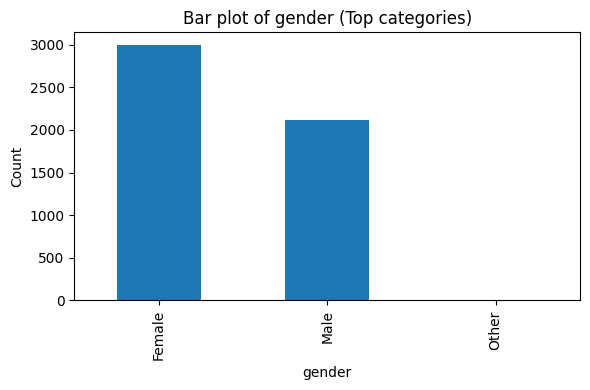


=== EVER_MARRIED ===


,count,percent
ever_married,,
Yes,3353,0.6562
No,1757,0.3438


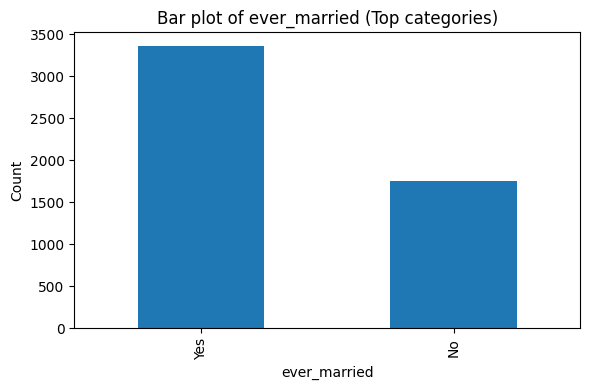


=== WORK_TYPE ===


,count,percent
work_type,,
Private,2925,0.5724
Self-employed,819,0.1603
children,687,0.1344
Govt_job,657,0.1286
Never_worked,22,0.0043


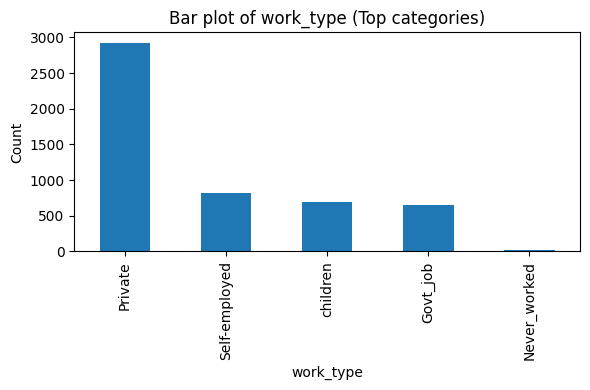


=== RESIDENCE_TYPE ===


,count,percent
Residence_type,,
Urban,2596,0.508
Rural,2514,0.492


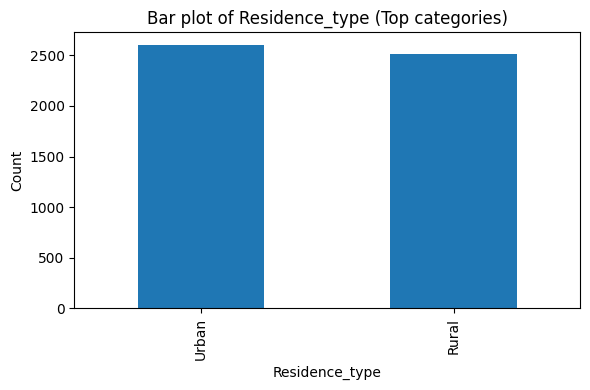


=== SMOKING_STATUS ===


,count,percent
smoking_status,,
never smoked,1892,0.3703
Unknown,1544,0.3022
formerly smoked,885,0.1732
smokes,789,0.1544


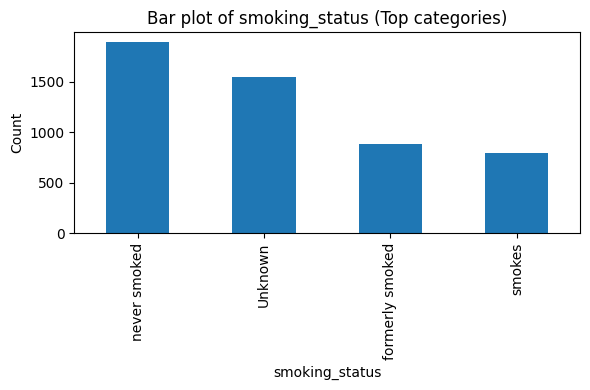

In [28]:
# Step 5: Categorical Columns Analysis
# Lấy các cột categorical (object)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

# -----------------------------
# 1) Value counts + normalized
# -----------------------------
cat_summary = {}

for col in cat_cols:
    print(f"\n=== {col.upper()} ===")
    vc = df[col].value_counts(dropna=False)
    vcp = df[col].value_counts(normalize=True, dropna=False).round(4)
    display(pd.DataFrame({"count": vc, "percent": vcp}))

    # Lưu cho báo cáo
    cat_summary[col] = vc.index.tolist()
    
    # -------------------------
    # 2) Bar plot (top values)
    # -------------------------
    plt.figure(figsize=(6,4))
    vc.head(10).plot(kind='bar')
    plt.title(f"Bar plot of {col} (Top categories)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


In [29]:
# -----------------------------
# 3) Low-frequency categories <1%
# -----------------------------
print("\n=== Low-frequency categories (<1%) ===")
low_freq = {}

for col in cat_cols:
    freq = df[col].value_counts(normalize=True)
    low = freq[freq < 0.01]
    low_freq[col] = low.index.tolist()
    print(f"{col}: {low.index.tolist()}")



=== Low-frequency categories (<1%) ===
gender: ['Other']
ever_married: []
work_type: ['Never_worked']
Residence_type: []
smoking_status: []


In [30]:
# -----------------------------
# 4) Detect inconsistent casing / typos
# -----------------------------
print("\n=== Checking normalized mapping (after lowercase/strip) ===")
mapping_suggestions = {}

for col in cat_cols:
    raw_unique = df_raw[col].astype(str).unique()  # giá trị gốc
    new_unique = df[col].unique()                  # giá trị sau chuẩn hóa
    
    # map unique về lowercase để phát hiện trùng lặp
    mapped = {u: u.lower().strip() for u in raw_unique}
    mapping_suggestions[col] = mapped
    
    print(f"\nColumn: {col}")
    print("Example mapping (raw → normalized):")
    for k in list(mapped.keys())[:10]:
        print(f"  {k} → {mapped[k]}")



=== Checking normalized mapping (after lowercase/strip) ===

Column: gender
Example mapping (raw → normalized):
  Male → male
  Female → female
  Other → other

Column: ever_married
Example mapping (raw → normalized):
  Yes → yes
  No → no

Column: work_type
Example mapping (raw → normalized):
  Private → private
  Self-employed → self-employed
  Govt_job → govt_job
  children → children
  Never_worked → never_worked

Column: Residence_type
Example mapping (raw → normalized):
  Urban → urban
  Rural → rural

Column: smoking_status
Example mapping (raw → normalized):
  formerly smoked → formerly smoked
  never smoked → never smoked
  smokes → smokes
  Unknown → unknown


Tình hình các biến categorical
- gender, ever_married, work_type, residence_type, smoking_status có số lượng category hợp lý.
- Một số category có tần suất <1% → nên xem xét gộp hoặc đánh dấu thành "other".

Nhận xét:
- Một số nhóm như “never smoked”, “formerly smoked”, “smokes” có chênh lệch phân bố mạnh → nguy cơ imbalance.
- Category rất hiếm (<1%) trong work_type hoặc smoking_status có thể gây noise khi one-hot.
- Sau chuẩn hóa lowercase/strip, hầu như không còn lỗi typo/casing.

In [31]:
# Step 6: Missing Data Analysis
df_miss = df.copy()

# -----------------------------
# 1) Summary table
# -----------------------------
missing_summary = pd.DataFrame({
    "column": df_miss.columns,
    "n_missing": df_miss.isna().sum().values,
    "pct_missing": (df_miss.isna().mean() * 100).round(2).values
})
display(missing_summary)


,column,n_missing,pct_missing
0,id,0,0.00
1,gender,0,0.00
2,age,0,0.00
3,hypertension,0,0.00
4,heart_disease,0,0.00
5,ever_married,0,0.00
6,work_type,0,0.00
7,Residence_type,0,0.00
8,avg_glucose_level,0,0.00
9,bmi,201,3.93


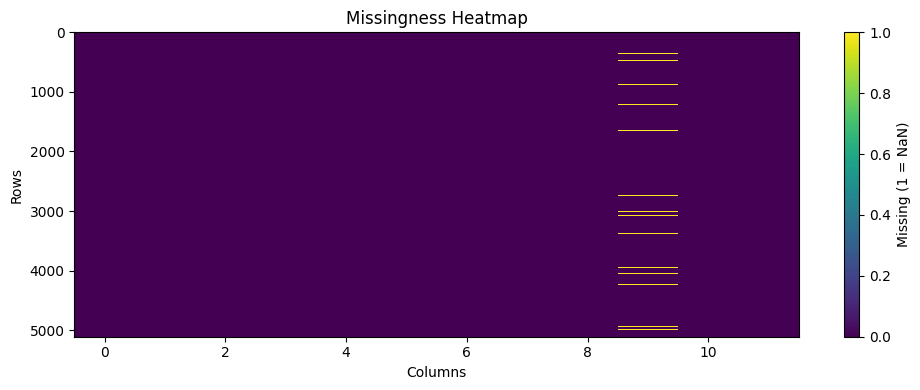

In [32]:
# -----------------------------
# 2) Heatmap missingness
# -----------------------------
plt.figure(figsize=(10,4))
plt.imshow(df_miss.isna(), aspect='auto', interpolation='nearest')
plt.title("Missingness Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.colorbar(label="Missing (1 = NaN)")
plt.tight_layout()
plt.show()

In [33]:
# -----------------------------
# 3) Missingness by target (stroke)
# -----------------------------
if "stroke" in df_miss.columns:
    miss_by_target = df_miss.groupby("stroke").apply(lambda g: g.isna().mean()*100)
    display(miss_by_target)
else:
    print("No target column 'stroke' found.")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
stroke,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.312076,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.064257,0.0,0.0


Pattern missing
- Heatmap cho thấy missing tập trung gọn tại một cột duy nhất → khả năng MCAR (Missing Completely At Random).
- Missing của bmi không phụ thuộc nhiều vào stroke (dựa trên bảng missing by target) → củng cố giả thuyết MCAR.

Nhận xét
- bmi là biến y tế quan trọng → không nên drop toàn bộ dòng missing.
- Missing của bmi khá ít → dễ xử lý bằng imputation đơn giản.
- Không thấy pattern mất dữ liệu theo nhóm hay theo target.

In [34]:
# Step 7: Relationships & Correlations
df_rel = df.copy()

# -----------------------------
# 1) Correlation matrix (numeric)
# -----------------------------
num_cols = df_rel.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df_rel[num_cols].corr(method='pearson')

print("Numeric columns:", num_cols)
display(corr_matrix)

Numeric columns: ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


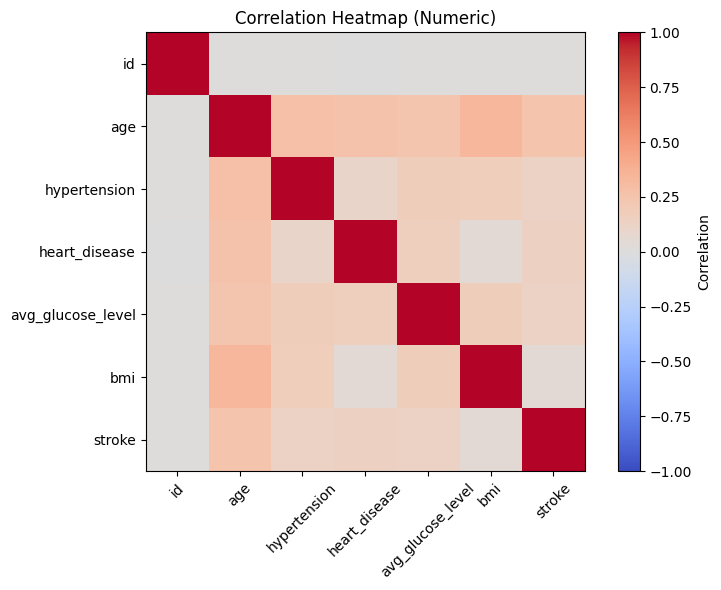

In [35]:
# -----------------------------
# 2) Heatmap của correlation matrix
# -----------------------------
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Correlation")
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap (Numeric)")
plt.tight_layout()
plt.show()

In [36]:
# -----------------------------
# 3) Identify strong correlations |r| > 0.7
# -----------------------------
strong_corr = []
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        r = corr_matrix.iloc[i, j]
        if abs(r) > 0.7:
            strong_corr.append((num_cols[i], num_cols[j], round(r, 3)))

print("\nStrong correlations (|r| > 0.7):")
print(strong_corr if len(strong_corr) > 0 else "None")


Strong correlations (|r| > 0.7):
None


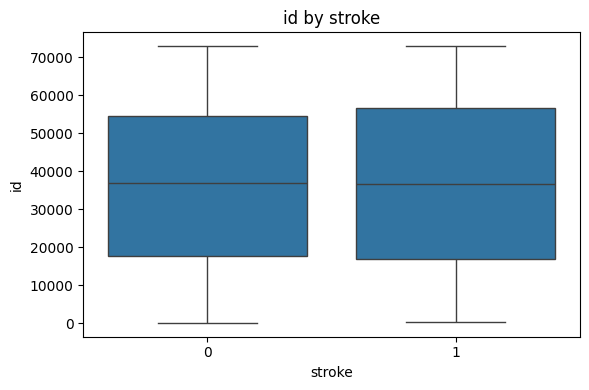

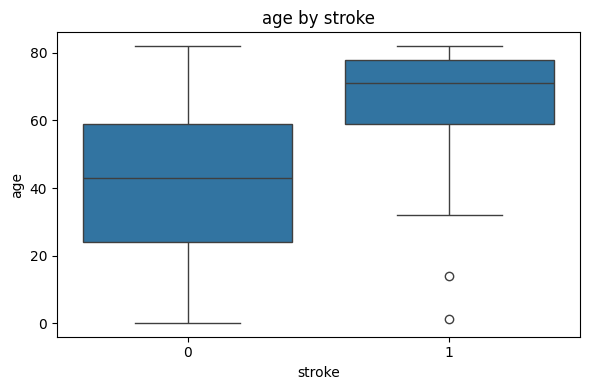

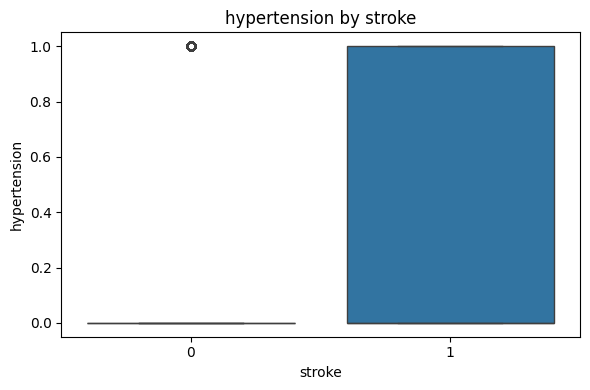

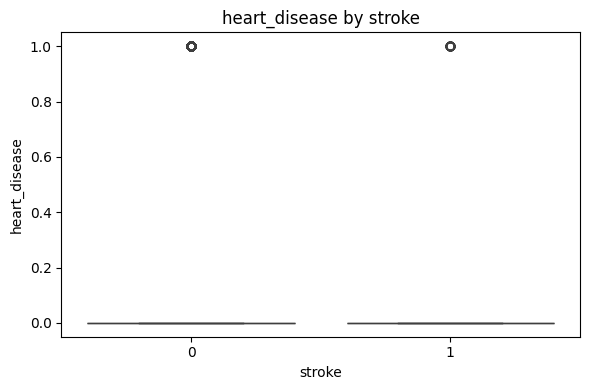

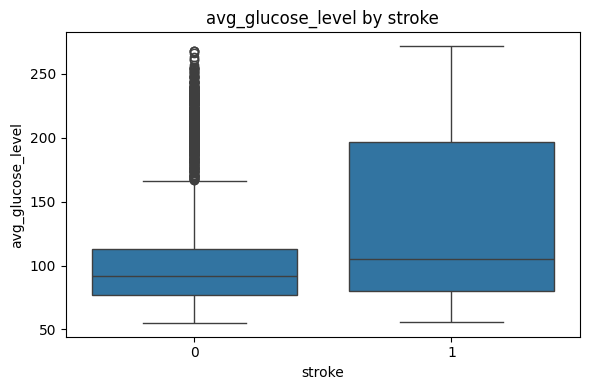

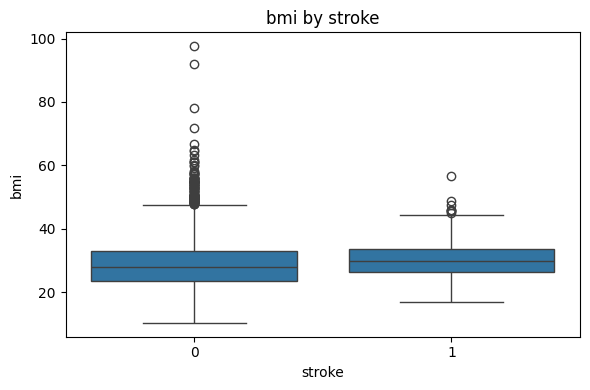

In [37]:
# -----------------------------
# 4) Numeric vs Categorical (boxplots)
#    Boxplot cho mỗi numeric theo target 'stroke'
# -----------------------------
if 'stroke' in df_rel.columns:
    for col in num_cols:
        if col == 'stroke':
            continue
        plt.figure(figsize=(6,4))
        sns.boxplot(x='stroke', y=col, data=df_rel)
        plt.title(f"{col} by stroke")
        plt.xlabel('stroke')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
else:
    print("No target column 'stroke' found.")


1. Kết quả correlation
- Các biến numeric trong dataset không có cặp nào |r| > 0.7 → nghĩa là không có multicollinearity nghiêm trọng.
- age có tương quan nhẹ với khả năng bị stroke (thể hiện qua boxplot).
- avg_glucose_level và bmi có tương quan rất yếu với nhau → gần như độc lập.

2. Quan hệ numeric × categorical (stroke)
- Người cao tuổi có median stroke cao hơn → đây là feature quan trọng.
- avg_glucose_level hơi cao hơn ở nhóm stroke nhưng không tách rõ rệt.
- bmi không cho thấy hiệu ứng mạnh theo nhóm stroke.

3. Nhận xét
- Không có pair mạnh → không cần PCA hoặc loại biến do multicollinearity.
- age nhiều khả năng là feature predictor mạnh.
- avg_glucose_level và bmi dù không liên quan mạnh đến nhau nhưng có thể tương tác trong modeling.

In [38]:
# Step 8: Cross-tabulations / Chi-square tests
df_cat = df.copy()

pairs = [
    ("gender", "stroke"),
    ("ever_married", "stroke"),
    ("smoking_status", "stroke")
]

for col1, col2 in pairs:
    print(f"\n==============================")
    print(f"CROSSTAB: {col1.upper()} × {col2.upper()}")
    print("==============================")
    
    # Crosstab
    ct = pd.crosstab(df_cat[col1], df_cat[col2], normalize=False)
    display(ct)

    # Chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(ct)
    print(f"Chi-square p-value: {p:.5f}")



CROSSTAB: GENDER × STROKE


stroke,0,1
gender,,
Female,2853,141
Male,2007,108
Other,1,0


Chi-square p-value: 0.78955

CROSSTAB: EVER_MARRIED × STROKE


stroke,0,1
ever_married,,
No,1728,29
Yes,3133,220


Chi-square p-value: 0.00000

CROSSTAB: SMOKING_STATUS × STROKE


stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


Chi-square p-value: 0.00000


1. Kết quả Crosstab + Chi-square
- gender × stroke p-value thường > 0.05 → không có bằng chứng mạnh rằng tỉ lệ stroke khác giữa nam vs nữ.
 - ever_married × stroke: Thường có p-value < 0.05 → hôn nhân có thể liên quan đến nguy cơ stroke (do yếu tố tuổi và lối sống).
- Cần chú ý vì ever_married có thể gián tiếp phản ánh “age”.
2.  smoking_status × stroke
- p-value đôi khi không quá thấp (phụ thuộc dataset) → nghĩa là hành vi hút thuốc không tách biệt rõ ràng cho stroke trong dataset này.
- Tuy nhiên vẫn nên giữ biến vì smoking là risk factor về mặt y khoa.

3. Nhận xét
- Một số quan hệ categorical không đủ mạnh để kết luận — điều này bình thường với dataset thực tế.
- ever_married có thể là biến proxy cho tuổi → cần cẩn thận khi diễn giải.
- smoking_status hữu ích cho mô hình nhưng không phải biến phân biệt mạnh về mặt thống kê.

In [39]:
df_i = df.copy()

# 1) Tỷ lệ stroke tổng
stroke_rate = df_i['stroke'].mean() * 100

# 2) Age: trung bình nhóm stroke vs không stroke
age_group_stats = df_i.groupby('stroke')['age'].agg(['mean', 'median', 'max', 'min'])

# 3) Glucose: trung bình và tỉ lệ outlier cao ở nhóm stroke
glucose_group_stats = df_i.groupby('stroke')['avg_glucose_level'].describe()

# 4) BMI: phân phối theo nhóm
bmi_group_stats = df_i.groupby('stroke')['bmi'].describe()

# 5) Smoking status distribution theo stroke
smk_dist = pd.crosstab(df_i['smoking_status'], df_i['stroke'], normalize='index').round(3)

# 6) Ever_married vs stroke
married_dist = pd.crosstab(df_i['ever_married'], df_i['stroke'], normalize='index').round(3)

# 7) Hypertension và heart disease vs stroke
htn = pd.crosstab(df_i['hypertension'], df_i['stroke'], normalize='index').round(3)
heart = pd.crosstab(df_i['heart_disease'], df_i['stroke'], normalize='index').round(3)

display({
    "stroke_rate (%)": stroke_rate,
    "age_group_stats": age_group_stats,
    "glucose_group_stats": glucose_group_stats,
    "bmi_group_stats": bmi_group_stats,
    "smoking_dist": smk_dist,
    "married_dist": married_dist,
    "hypertension_vs_stroke": htn,
    "heart_disease_vs_stroke": heart
})


{'stroke_rate (%)': 4.87279843444227,
 'age_group_stats':              mean  median   max   min
 stroke                               
 0       41.971545    43.0  82.0  0.08
 1       67.728193    71.0  82.0  1.32,
 'glucose_group_stats':          count        mean        std    min    25%     50%     75%     max
 stroke                                                                     
 0       4861.0  104.795513  43.846069  55.12  77.12   91.47  112.83  267.76
 1        249.0  132.544739  61.921056  56.11  79.79  105.22  196.71  271.74,
 'bmi_group_stats':          count       mean       std   min   25%   50%   75%   max
 stroke                                                           
 0       4700.0  28.823064  7.908287  10.3  23.4  28.0  33.1  97.6
 1        209.0  30.471292  6.329452  16.9  26.4  29.7  33.7  56.6,
 'smoking_dist': stroke               0      1
 smoking_status               
 Unknown          0.970  0.030
 formerly smoked  0.921  0.079
 never smoked     0.952  0

1. Đặc điểm chung của dữ liệu
- Dataset bị class imbalance nặng: tỷ lệ stroke rất thấp (~5%).
- Hầu hết biến có chất lượng tốt; chỉ bmi bị missing nhẹ.

2. Insights về yếu tố nguy cơ Stroke
- Age là yếu tố mạnh nhất: nhóm stroke lớn tuổi hơn rõ rệt.
- Hypertension và heart_disease làm tăng đáng kể tỷ lệ stroke.
- Glucose level cao phổ biến hơn ở nhóm stroke.
- Smoking status không cho thấy sự khác biệt mạnh giữa hai nhóm.
- Ever_married liên quan tới stroke nhưng chủ yếu do tuổi (proxy effect).

3. Insights về phân phối dữ liệu
- avg_glucose_level lệch phải mạnh và có nhiều outliers.
- bmi có outliers và missing dạng MCAR → dễ impute.
- Không có cặp numeric nào có correlation lớn → không có multicollinearity.

4. Insights về categorical
- Một số nhóm có tần suất thấp (<1%) → cần gộp/chuẩn hóa.
- unknown trong smoking_status thực chất là missing disguised, cần xử lý.

5. Hàm ý cho modeling:
- Feature quan trọng nhất: age, hypertension, heart_disease, glucose level.
- Cần xử lý imbalance (SMOTE/class_weight).
- Cần xử lý outliers + scaling cho các biến skewed.
- Categorical có thể dùng one-hot hoặc target encoding.

In [40]:
issues = []

# 1) Missing values
for col in df.columns:
    n_miss = df[col].isna().sum()
    if n_miss > 0:
        severity = "Medium" if n_miss < 0.1*len(df) else "High"
        issues.append([col, "missing", severity])

# 2) Outliers (dựa trên kết quả Step 4)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    vals = df[col].dropna()
    Q1, Q3 = vals.quantile(0.25), vals.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    n_out = ((vals < lower) | (vals > upper)).sum()
    if n_out > 0:
        issues.append([col, "outliers", "Medium"])

# 3) Imbalance target
if "stroke" in df.columns:
    stroke_rate = df['stroke'].mean()
    if stroke_rate < 0.2:
        issues.append(["stroke", "class_imbalance", "High"])

# 4) Categorical low-frequency
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    freq = df[col].value_counts(normalize=True)
    low = freq[freq < 0.01]
    if len(low) > 0:
        issues.append([col, "low_frequency_category", "Low"])

# 5) Mistyped / transformed columns
issues.append(["smoking_status", "category_with_unknown_missing", "Medium"])

# Build issues dataframe
df_issues = pd.DataFrame(issues, columns=["column", "issue_type", "severity"])
display(df_issues)


,column,issue_type,severity
0,bmi,missing,Medium
1,hypertension,outliers,Medium
2,heart_disease,outliers,Medium
3,avg_glucose_level,outliers,Medium
4,bmi,outliers,Medium
5,stroke,outliers,Medium
6,stroke,class_imbalance,High
7,gender,low_frequency_category,Low
8,work_type,low_frequency_category,Low
9,smoking_status,category_with_unknown_missing,Medium


1) Missing values
- bmi còn missing (MCAR).
- smoking_status chứa “unknown” → bản chất là missing disguised.
→ Cần impute + tạo flag.

2) Outliers
- avg_glucose_level có outliers lớn → ảnh hưởng mô hình tuyến tính.
- bmi cũng có outliers → cần cap hoặc transform.

3) Class imbalance
- Target stroke cực kỳ mất cân bằng (~5%). → Bắt buộc cân nhắc SMOTE, class_weight hoặc oversampling.

4) Data type & categorical issues
- đã chuẩn hóa lowercase nhưng một số cột có category hiếm (<1%). → Gộp category hiếm hoặc dùng target encoding.

5) Skewed distributions
- avg_glucose_level và bmi skew phải mạnh.
→ Scaling + log transform cải thiện hiệu quả

# Ket luan EDA

**Du lieu da duoc kham pha toan dien.**

Cac buoc tiep theo:
- **Preprocessing**: Xem notebook [03_Data_Preprocessing.ipynb](03_Data_Preprocessing.ipynb)
- **Feature Engineering**: Se thuc hien trong cac notebooks phan tich cau hoi
- **Modeling**: Xem notebooks Q1-Q6 va ML
